### Imports

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import datetime
%matplotlib notebook

### Nicole Covid Code

In [50]:
#reference file
file = "Resources/use_this_covid_data.csv"

In [51]:
#import data frame
covid_data = pd.read_csv(file)
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [52]:
#check all column names
covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [53]:
covid_data.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

In [54]:
#convert date column to datetime
covid_data["date"] = pd.to_datetime(covid_data["date"])

In [55]:
#create month column
covid_data["month"] = covid_data["date"].dt.month
covid_data.head()

#create year column
covid_data["year"] = covid_data["date"].dt.year
covid_data.head()

#filter out 2021 data
covid_data_2020 = covid_data.loc[covid_data["year"] == 2020]

covid_data_2020.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,month,year
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2,2020
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2,2020
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2,2020
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2,2020
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2,2020


In [56]:
#add 8 countries info to data frame
#US
#Canada
#China
#Brazil
#Germany
#India
#Japan
#Mexico

countries_data = covid_data_2020.loc[(covid_data_2020["location"] == "United States") |
                           (covid_data_2020["location"] == "Canada") | 
                           (covid_data_2020["location"] == "China") | 
                           (covid_data_2020["location"] == "Brazil") | 
                           (covid_data_2020["location"] == "Germany") | 
                           (covid_data_2020["location"] == "India") | 
                           (covid_data_2020["location"] == "Japan") | 
                           (covid_data_2020["location"] == "Mexico")]

countries_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,month,year
10872,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,2,2020
10873,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,2,2020
10874,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,2,2020
10875,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,2,2020
10876,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80693,USA,North America,United States,2020-12-27,19255126.0,155635.0,185778.714,339248.0,1427.0,2340.143,...,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,12,2020
80694,USA,North America,United States,2020-12-28,19429760.0,174634.0,182290.857,341251.0,2003.0,2352.571,...,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,12,2020
80695,USA,North America,United States,2020-12-29,19630012.0,200252.0,182611.000,344882.0,3631.0,2385.714,...,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,12,2020
80696,USA,North America,United States,2020-12-30,19863696.0,233684.0,183191.857,348613.0,3731.0,2429.571,...,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,12,2020


In [57]:
#find total deaths for each country
countries_deaths = countries_data.groupby(["location"])["total_deaths_per_million"].max()
countries_deaths

location
Brazil            917.151
Canada            417.623
China               3.322
Germany           403.311
India             107.781
Japan              26.029
Mexico            975.757
United States    1063.717
Name: total_deaths_per_million, dtype: float64

<IPython.core.display.Javascript object>


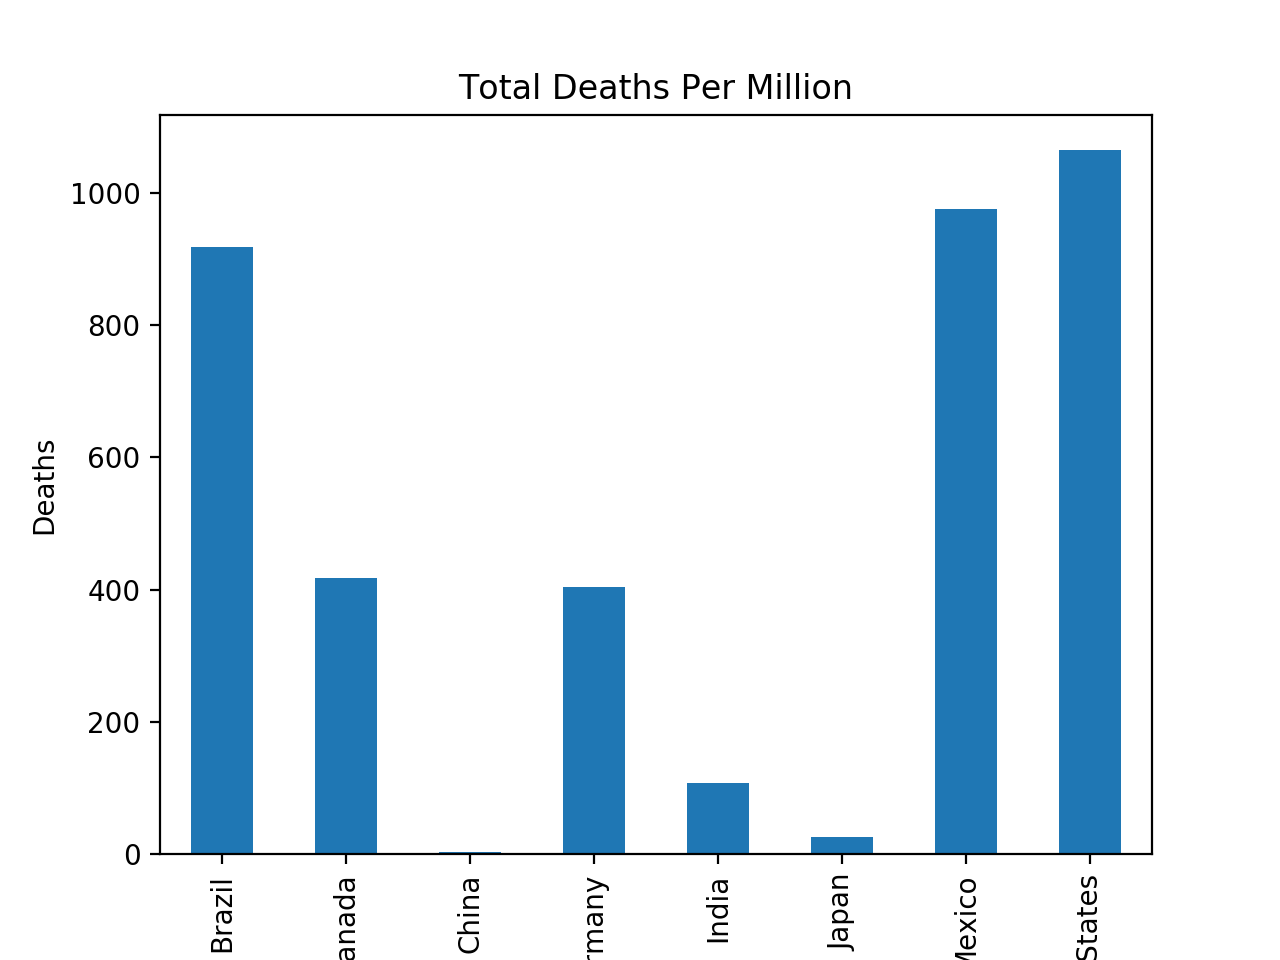

In [58]:
#bar chart of deaths for each country

bar_plot = countries_deaths.plot(kind = "bar")

#labels
plt.title("Total Deaths Per Million")
plt.xlabel("Country")
plt.ylabel("Deaths")

plt.show()

In [59]:
#reduce data down to country, date and total deaths
reduced_data = countries_data.loc[:, ["location", "month", "total_deaths"]]
reduced_data

,location,month,total_deaths
10872,Brazil,2,NaN
10873,Brazil,2,NaN
10874,Brazil,2,NaN
10875,Brazil,2,NaN
10876,Brazil,3,NaN
...,...,...,...
80693,United States,12,339248.0
80694,United States,12,341251.0
80695,United States,12,344882.0
80696,United States,12,348613.0


In [14]:
#get rid of days that don't have deaths
#reduced_data = reduced_data.dropna(how = "any")
#reduced_data

In [60]:
#find number of deaths per month
#last total death number per month
month_data = reduced_data.groupby(["location", "month"])["total_deaths"].last()
month_data_df = pd.DataFrame(month_data)
month_data_df

total_deaths
location      month              
Brazil        2               NaN
              3             201.0
              4            6006.0
              5           29314.0
              6           59594.0
...                           ...
United States 8          183802.0
              9          207201.0
              10         231733.0
              11         270996.0
              12         352093.0

[95 rows x 1 columns]

<IPython.core.display.Javascript object>


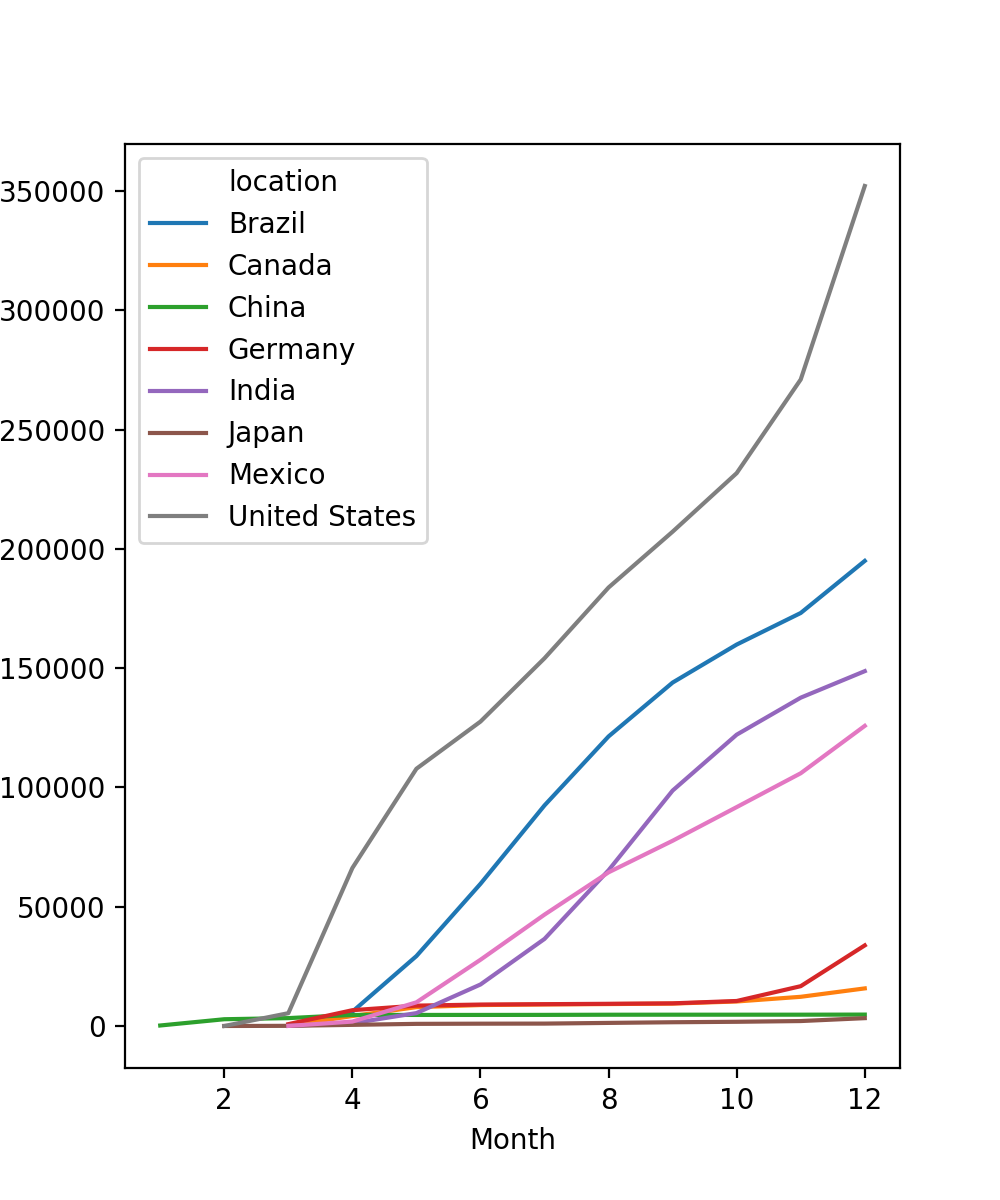

Text(0, 0.5, 'Deaths')

In [70]:
# plot data
fig, ax = plt.subplots(figsize=(5,6))
# use unstack()
reduced_data.groupby(["month","location"])["total_deaths"].last().unstack().plot(ax=ax)
ax.set_xlabel("Month")
ax.set_ylabel("Deaths")

### Enrique Covid Code

### Currency Code

### Stock Code

### Question 1: How do countries rate on per-capital covid deaths?

* Bar graph: per-capita deaths by country
    
* Line graph: per capita deaths over time

### Question 2: 

### Question 3:

### Analysis